# 機器學習案例
## 以 Python 執行 Logistic Regression
### 匯入套件
#### Numpy、Pandas、Matplotlib
### 載入測試數據

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D://Ben/Ben/OneDrive/2019/Python/Materials/LR_Data.csv')

In [3]:
data.head()

,49,0
0,26,0
1,42,1
2,27,0
3,49,1
4,47,1


#### 預覽數據集，無欄位名稱，增加欄位名稱

In [4]:
data.columns=['hours','passed']

In [5]:
data.head()

,hours,passed
0,26,0
1,42,1
2,27,0
3,49,1
4,47,1


#### 以圖像檢視數據結構

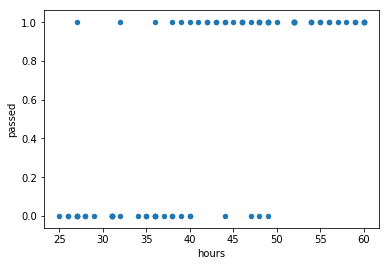

In [6]:
data.plot.scatter('hours','passed');

In [7]:
data.shape

(80, 2)

### 匯入執行子套件
#### 拆分訓練與測試數據集 train_test_split
#### 訓練、建模與預測 LogisticRegresion
#### 混淆矩陣 confusion_matirx
#### 分類報表 classficication_report

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 拆分訓練與測試數據集

In [9]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['hours']],data.passed,test_size=0.5,random_state=10)
# set 'random_state=int' to fix the seed

In [10]:
x_test.head()

,hours
41,31
46,29
26,39
32,31
35,27


### 建立分類器 clf , 閥值 (threshold) 沿用預設值 0.5

In [11]:
#from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() # 選擇運算法，建立分類器
clf.fit(x_train,y_train) # 訓練模型，完成分類器

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### 執行分類器，以 x_test 為測試數據

In [12]:
y_pred=clf.predict(x_test)
y_true=y_test

#### 混淆矩陣 confusion matrix

In [13]:
# from sklearn.metrics import confusion_matrix
tcm=confusion_matrix(y_true,y_pred)
print(tcm)
# [tn fp]
# [fn tp]

[[11  4]
 [ 1 24]]


#### 直接以測試數據集計算準確度 Accuracy

In [17]:
clf.score(x_test,y_test)

0.875

#### 產出分類報表

In [14]:
# from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.86      0.96      0.91        25

   micro avg       0.88      0.88      0.88        40
   macro avg       0.89      0.85      0.86        40
weighted avg       0.88      0.88      0.87        40



#### 產出機率，取代 y 預測值，可自行據此設定閥值 (threshold)後，算出 y 預測值。

In [15]:
prob=clf.predict_proba(x_test)
prob[:5,:]

array([[0.54845442, 0.45154558],
       [0.57380747, 0.42619253],
       [0.44584536, 0.55415464],
       [0.54845442, 0.45154558],
       [0.59877838, 0.40122162]])

In [16]:
y_pred[0:5] # 檢查預設閥值

array([0, 0, 1, 0, 0], dtype=int64)

### 自行設定閥值
#### 預測結果 y_pred1

In [17]:
th=0.72
y_pred1=[]
for i in prob:
    if i[1] <th:
        y_pred1.append(0)
    else:
        y_pred1.append(1)
print(f'預測為 0 的數量:{y_pred1.count(0)}')
print(f'預測為 1 的數量:{y_pred1.count(1)}')

預測為 0 的數量:30
預測為 1 的數量:10


#### 預設閥值的分類結果 y_pred 

In [27]:
print("0:",list(y_pred).count(0))
print("1:",list(y_pred).count(1))

0: 12
1: 28


### 評估結果
#### 混淆矩陣

In [27]:
# from sklearn.metrics import confusion_matrix
tcm=confusion_matrix(y_true,y_pred1)
#[TN,FP,FN,TP]
print(f'if Threshold = {th} :')
print(tcm)

if Threshold = 0.72 :
[[15  0]
 [15 10]]


#### 產出分類報表

In [28]:
# from sklearn.metrics import classification_report
print(f'if Threshold = {th} :')
print(classification_report(y_true, y_pred1))
# reduce th > recall +, precission -

if Threshold = 0.72 :
             precision    recall  f1-score   support

          0       0.50      1.00      0.67        15
          1       1.00      0.40      0.57        25

avg / total       0.81      0.62      0.61        40



#### check data type

In [31]:
print(type(y_test)) # created by train_test_split method
print(type(y_pred)) # created by predict method
print(type(y_pred1)) # created by myself

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'list'>


# 以鳶尾花數據集 Iris Dataset 測試 Versicolor 分類

In [18]:
data=pd.read_csv(r'D:\Ben\Ben\OneDrive\2019\Python\Materials\IrisVersicolor.csv')

In [19]:
data.head()

,Sepal_L,Sepal_W,Petal_L,Petal_W,Versicolor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:4],data.Versicolor,test_size=0.5,random_state=10)

In [24]:
x_train

,Sepal_L,Sepal_W,Petal_L,Petal_W
133,6.3,2.8,5.1,1.5
6,4.6,3.4,1.4,0.3
79,5.7,2.6,3.5,1.0
108,6.7,2.5,5.8,1.8
99,5.7,2.8,4.1,1.3
34,4.9,3.1,1.5,0.2
128,6.4,2.8,5.6,2.1
50,7.0,3.2,4.7,1.4
96,5.7,2.9,4.2,1.3
4,5.0,3.6,1.4,0.2


In [28]:
y_train.head()

133    0
6      0
79     1
108    0
99     1
Name: Versicolor, dtype: int64

In [30]:
clf=LogisticRegression() # 選擇運算法，建立分類器
clf.fit(x_train,y_train) # 訓練模型，完成分類器

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
y_pred=clf.predict(x_test)
y_true=y_test

In [32]:
tcm=confusion_matrix(y_true,y_pred)
print(tcm)
# [tn fp]
# [fn tp]

[[46  2]
 [22  5]]


In [34]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79        48
           1       0.71      0.19      0.29        27

   micro avg       0.68      0.68      0.68        75
   macro avg       0.70      0.57      0.54        75
weighted avg       0.69      0.68      0.61        75



In [35]:
prob=clf.predict_proba(x_test)

In [39]:
th=0.4
y_pred1=[]
for i in prob:
    if i[1] <th:
        y_pred1.append(0)
    else:
        y_pred1.append(1)
print(f'預測為 0 的數量:{y_pred1.count(0)}')
print(f'預測為 1 的數量:{y_pred1.count(1)}')

預測為 0 的數量:57
預測為 1 的數量:18


In [41]:
tcm=confusion_matrix(y_true,y_pred1)
print(tcm)
# [tn fp]
# [fn tp]

[[41  7]
 [16 11]]


# Iris Data Spec.

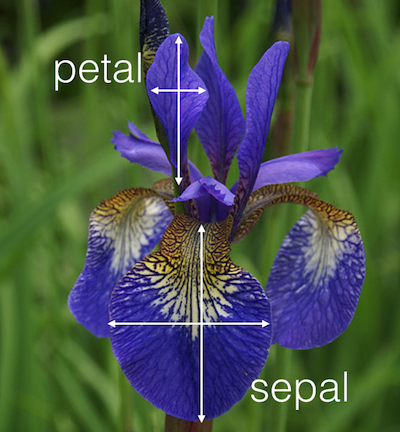

In [16]:
Image(filename='D://Ben/Ben/OneDrive/2019/Python/Materials/iris.png')